<a href="https://colab.research.google.com/github/hadibadri/Projects/blob/main/Vitligo_Detection_NNs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.optimizers import RMSprop

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Data Generator
train = ImageDataGenerator(rescale=1/255)
test = ImageDataGenerator(rescale=1/255)

# Train and Test Data
train_dataset = train.flow_from_directory(r'/content/drive/MyDrive/Vitligo/train',target_size=(150,150), class_mode='binary', batch_size=64)


# Read the validation dataset
validation_dataset = test.flow_from_directory(r'/content/drive/MyDrive/Vitligo/test',target_size=(150,150), class_mode='binary', batch_size=64)

# MODEL
model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(16,(3,3), activation="relu", input_shape=(150,150,3)),
                                        tf.keras.layers.MaxPooling2D(2,2),
                                        tf.keras.layers.Dropout(0.2),
                                        tf.keras.layers.Conv2D(32,(3,3), activation="relu"),
                                        tf.keras.layers.MaxPooling2D(2,2),
                                        tf.keras.layers.Dropout(0.2),
                                        tf.keras.layers.Conv2D(64,(3,3), activation="relu"),
                                        tf.keras.layers.MaxPooling2D(2,2),
                                        tf.keras.layers.Dropout(0.2),
                                        tf.keras.layers.Flatten(),
                                        tf.keras.layers.Dense(128, activation="relu"),
                                        tf.keras.layers.Dense(1, activation="sigmoid")])

model.compile(loss="binary_crossentropy",optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),metrics=['accuracy'])

history = model.fit(train_dataset,epochs=25,validation_data = validation_dataset)

# Accuracy plot
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

# Loss value plot
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

Found 2867 images belonging to 2 classes.
Found 718 images belonging to 2 classes.


"\nhistory = model.fit(train_dataset,epochs=25,validation_data = validation_dataset)\n\n# Accuracy plot\nplt.plot(history.history['accuracy'])\nplt.plot(history.history['val_accuracy'])\nplt.title('model accuracy')\nplt.ylabel('accuracy')\nplt.xlabel('epoch')\nplt.legend(['train', 'test'], loc='upper left')\nplt.show()\n\n# Loss value plot\nplt.plot(history.history['loss'])\nplt.plot(history.history['val_loss'])\nplt.title('model loss')\nplt.ylabel('loss')\nplt.xlabel('epoch')\nplt.legend(['train', 'test'], loc='upper left')\nplt.show() "

In [ ]:
model.evaluate(validation_dataset)

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

# Setup the train and test directories
train_dir = "/content/drive/MyDrive/Vitligo/train"
test_dir = "/content/drive/MyDrive/Vitligo/test"

# Import data from directories and turn it into batches
train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32, # number of images to process at a time
                                               target_size=(224, 224), # convert all images to be 224 x 224
                                               class_mode="binary", # type of problem we're working on
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)
model_1 = tf.keras.models.Sequential([
  tf.keras.layers.Conv2D(filters=10,
                         kernel_size=3, # can also be (3, 3)
                         activation="relu",
                         input_shape=(224, 224, 3)), # first layer specifies input shape (height, width, colour channels)
  tf.keras.layers.Conv2D(16, 3, activation="relu"),
  tf.keras.layers.MaxPool2D(pool_size=2, # pool_size can also be (2, 2)
                            padding="valid"), # padding can also be 'same'
  tf.keras.layers.Conv2D(16, 3, activation="relu"),
  tf.keras.layers.Conv2D(16, 3, activation="relu"), # activation='relu' == tf.keras.layers.Activations(tf.nn.relu)
  tf.keras.layers.MaxPool2D(2),
  tf.keras.layers.Flatten(),
  tf.keras.layers.Dense(1, activation="sigmoid") # binary activation output
])

# Compile the model
model_1.compile(loss="binary_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history_1 = model_1.fit(train_data,
                        epochs=10,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


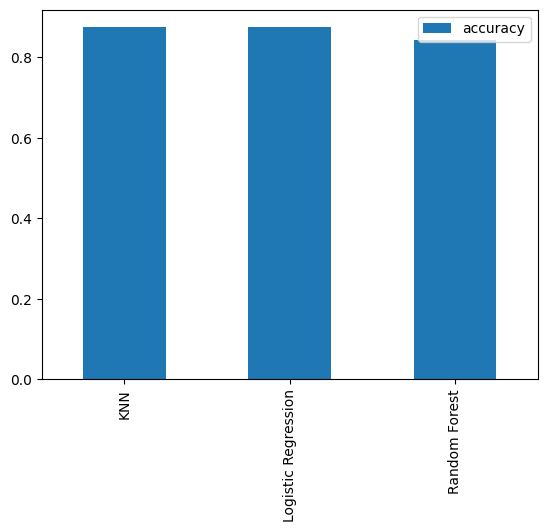

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.metrics import RocCurveDisplay

# Split the train_data into X_train and y_train
X_train, y_train = next(train_data)

# Split the valid_data into X_test and y_test
X_test, y_test = next(valid_data)

X_train = X_train.reshape(-1, 224 * 224 * 3)
X_test = X_test.reshape(-1, 224 * 224 * 3)

models = {"KNN": KNeighborsClassifier(),
          "Logistic Regression": LogisticRegression(),
          "Random Forest": RandomForestClassifier()}

def fit_and_score(models, X_train, X_test, y_train, y_test):

    np.random.seed(42)

    model_scores = {}

    for name, model in models.items():
        model.fit(X_train, y_train)
        model_scores[name] = model.score(X_test, y_test)
    return model_scores

model_scores = fit_and_score(models=models,
                             X_train=X_train,
                             X_test=X_test,
                             y_train=y_train,
                             y_test=y_test)

model_compare = pd.DataFrame(model_scores, index=['accuracy'])
model_compare.T.plot.bar();


In [ ]:
param_grid = {
    'n_neighbors': [1, 2, 3, 4, 5, 6, 7],
    'weights': ['uniform', 'distance'],
    'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute'],
    'p': [1, 2]
}

# Initialize the LogisticRegression model
model_3 = KNeighborsClassifier()

# Define the RandomizedSearchCV object
random_search = RandomizedSearchCV(
    estimator=model_3,
    param_distributions=param_grid,
    n_iter=10,
    cv=10,
    verbose=1,
)

random_search.fit(X_train, y_train)

best_params = random_search.best_params_

best_model = random_search.best_estimator_

test_score = best_model.score(X_test, y_test)

print("Best Hyperparameters:", best_params)
print("Test Score:", test_score)

Fitting 10 folds for each of 10 candidates, totalling 100 fits
Best Hyperparameters: {'weights': 'uniform', 'p': 1, 'n_neighbors': 5, 'algorithm': 'brute'}
Test Score: 0.875


In [ ]:
param_grid_1 = {
    'n_neighbors': [3, 5, 7, 9, 11, 13, 15],
    'weights': ['uniform', 'distance'],
    'metric': ['euclidean', 'manhattan', 'minkowski']
}

gridcv = GridSearchCV(model_3, param_grid_1, cv=5)

gridcv.fit(X_train, y_train)

# Print the best hyperparameters
print("Best hyperparameters:", gridcv.best_params_)

# Use the best KNN model to make predictions
best_knngcv = gridcv.best_estimator_
test_score = best_knngcv.score(X_test, y_test)
print("Test Score:", test_score)

Best hyperparameters: {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
Test Score: 0.84375


In [ ]:
import pickle
with open("best_knn.pkl", "wb") as f:
    pickle.dump(best_knngcv, f)

In [ ]:
model_4 = RandomForestClassifier()

# Define the hyperparameter grid
param_grid_4 = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Create the GridSearchCV object
grid_search = GridSearchCV(estimator=model_4, param_grid=param_grid_4, cv=10)

# Fit the grid search object to the data
grid_search.fit(X_train, y_train)

# Get the best model
best_model = grid_search.best_estimator_

# Evaluate the best model on the test data
test_score = best_model.score(X_test, y_test)

print("Best Hyperparameters:", grid_search.best_params_)
print("Test Score:", test_score)

model_scores

Best Hyperparameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 200}
Test Score: 0.875


{'KNN': 0.875, 'Logistic Regression': 0.875, 'Random Forest': 0.84375}

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, InputLayer, Flatten
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from  matplotlib import pyplot as plt
import matplotlib.image as mpimg
from tensorflow.keras.optimizers import RMSprop


# Set the seed
tf.random.set_seed(42)

# Preprocess data (get all of the pixel values between 1 and 0, also called scaling/normalization)
train_datagen = ImageDataGenerator(rescale=1./255)
valid_datagen = ImageDataGenerator(rescale=1./255)

train_dir = "/content/drive/MyDrive/Vitligo/train"
test_dir = "/content/drive/MyDrive/Vitligo/test"

train_data = train_datagen.flow_from_directory(train_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

valid_data = valid_datagen.flow_from_directory(test_dir,
                                               batch_size=32,
                                               target_size=(224, 224),
                                               class_mode="binary",
                                               seed=42)

y_train = tf.keras.utils.to_categorical(train_data.classes)
y_test = tf.keras.utils.to_categorical(valid_data.classes)

model_i = tf.keras.applications.InceptionV3(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling=None,
    classes=2,
    classifier_activation='softmax'
)

# Compile the model
model_i = tf.keras.applications.InceptionV3(
    include_top=False,
    weights='imagenet',
    input_tensor=None,
    input_shape=(224, 224, 3),
    pooling=None,
    classes=2,
    classifier_activation='softmax'
)

# Freeze the convolutional layers in the pre-trained model
model_i.trainable = False

# Add a global average pooling layer
model_i = tf.keras.models.Sequential([
    model_i,
    tf.keras.layers.GlobalAveragePooling2D(),
])
# Add a dropout layer to prevent overfitting
model_i.add(tf.keras.layers.Dropout(0.2))

# Add a dense layer with 1 neuron and sigmoid activation for binary classification
model_i.add(tf.keras.layers.Dense(1, activation='sigmoid'))

# Compile the model
model_i.compile(loss='binary_crossentropy',
              optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001),
              metrics=['accuracy'])

# Train the model
history_i = model_i.fit(train_data,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

# Evaluate the model on the test set
test_loss, test_acc = model_i.evaluate(valid_data)
print('validation loss:', test_loss)
print('validation accuracy:', test_acc)

Found 2867 images belonging to 2 classes.
Found 718 images belonging to 2 classes.
87910968/87910968 [==============================] - 3s 0us/step
Epoch 1/20
90/90 [==============================] - 971s 11s/step - loss: 0.7246 - accuracy: 0.5507 - val_loss: 0.5347 - val_accuracy: 0.7493
Epoch 2/20
90/90 [==============================] - 25s 282ms/step - loss: 0.4867 - accuracy: 0.7698 - val_loss: 0.4108 - val_accuracy: 0.8148
Epoch 3/20
90/90 [==============================] - 27s 301ms/step - loss: 0.3816 - accuracy: 0.8350 - val_loss: 0.3559 - val_accuracy: 0.8454
Epoch 4/20
90/90 [==============================] - 25s 279ms/step - loss: 0.3310 - accuracy: 0.8559 - val_loss: 0.3202 - val_accuracy: 0.8733
Epoch 5/20
90/90 [==============================] - 26s 284ms/step - loss: 0.3008 - accuracy: 0.8748 - val_loss: 0.2974 - val_accuracy: 0.8719
Epoch 6/20
90/90 [==============================] - 25s 276ms/step - loss: 0.2814 - accuracy: 0.8852 - val_loss: 0.2813 - val_accuracy: 0.

In [ ]:
print('validation loss:', test_loss)
print('validation accuracy:', test_acc)

validation loss: 0.18256790935993195
validation accuracy: 0.9275766015052795


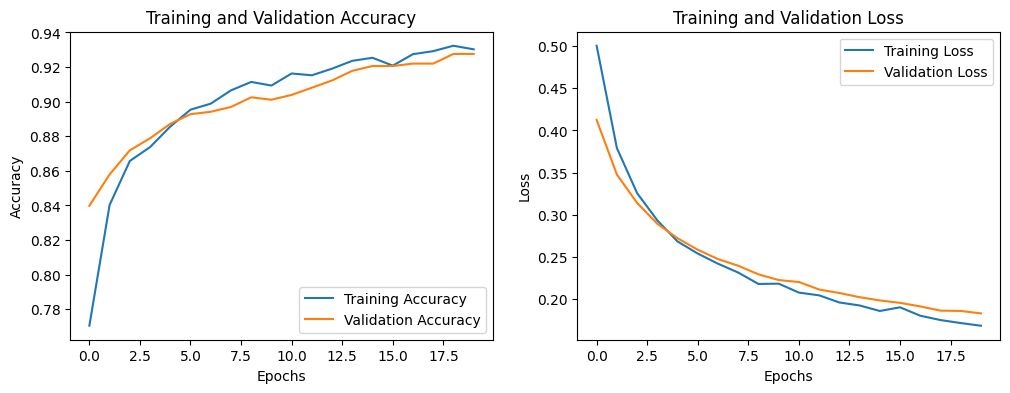

In [ ]:
import matplotlib.pyplot as plt

# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_i.history['accuracy'], label='Training Accuracy')
plt.plot(history_i.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_i.history['loss'], label='Training Loss')
plt.plot(history_i.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


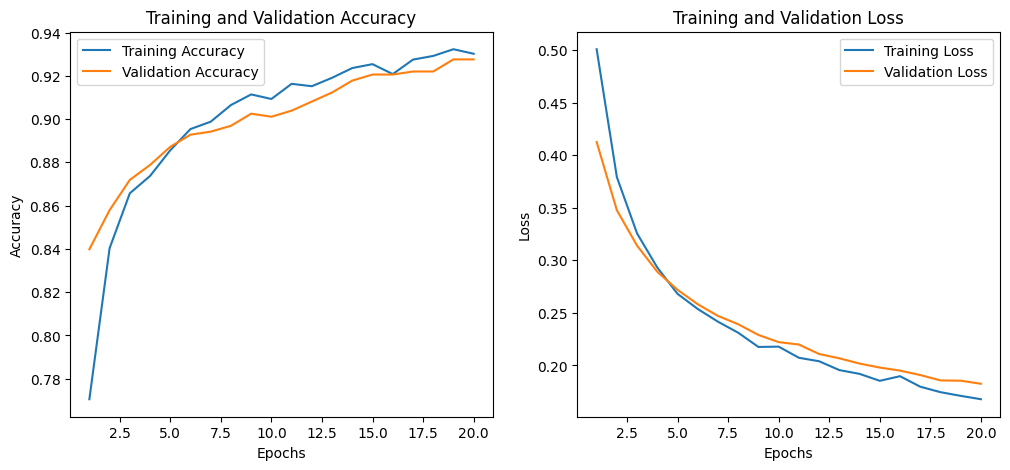

In [ ]:
import matplotlib.pyplot as plt

# Data from training and validation
epochs = list(range(1, 21))
train_loss = [0.5007, 0.3791, 0.3255, 0.2931, 0.2681, 0.2537, 0.2416, 0.2311, 0.2176, 0.2179, 0.2073, 0.2040, 0.1956, 0.1920, 0.1854, 0.1898, 0.1798, 0.1746, 0.1711, 0.1679]
val_loss = [0.4125, 0.3476, 0.3139, 0.2891, 0.2719, 0.2582, 0.2471, 0.2392, 0.2290, 0.2222, 0.2199, 0.2109, 0.2068, 0.2018, 0.1980, 0.1951, 0.1909, 0.1858, 0.1855, 0.1826]
train_acc = [0.7705, 0.8403, 0.8657, 0.8737, 0.8856, 0.8954, 0.8988, 0.9065, 0.9114, 0.9093, 0.9163, 0.9152, 0.9191, 0.9236, 0.9254, 0.9208, 0.9275, 0.9292, 0.9323, 0.9302]
val_acc = [0.8398, 0.8579, 0.8719, 0.8788, 0.8872, 0.8928, 0.8942, 0.8969, 0.9025, 0.9011, 0.9039, 0.9081, 0.9123, 0.9178, 0.9206, 0.9206, 0.9220, 0.9220, 0.9276, 0.9276]

# Plot training and validation accuracy
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(epochs, train_acc, label='Training Accuracy')
plt.plot(epochs, val_acc, label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(epochs, train_loss, label='Training Loss')
plt.plot(epochs, val_loss, label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')

plt.show()


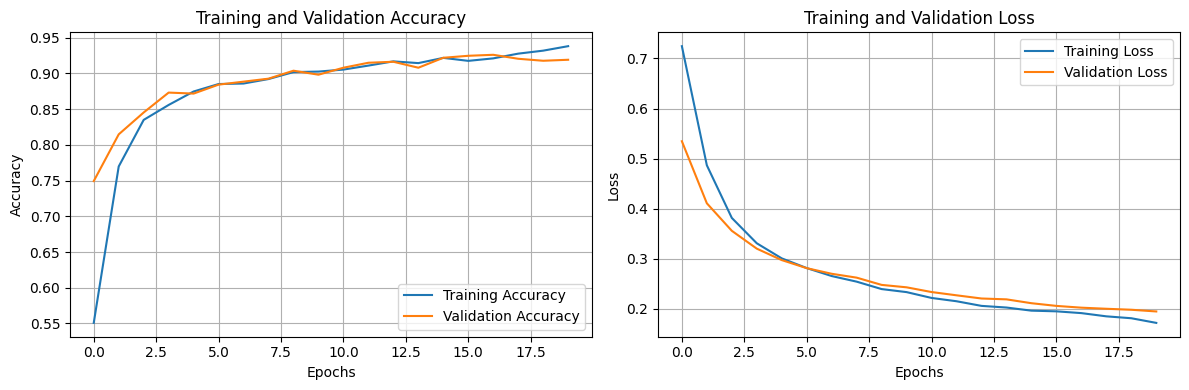

In [ ]:
import matplotlib.pyplot as plt

# Assuming history_i contains training and validation metrics
epochs = list(range(1, 21))
# Plot training and validation accuracy
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
plt.plot(history_i.history['accuracy'], label='Training Accuracy')
plt.plot(history_i.history['val_accuracy'], label='Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.title('Training and Validation Accuracy')
plt.grid(True)  # Add gridlines

# Plot training and validation loss
plt.subplot(1, 2, 2)
plt.plot(history_i.history['loss'], label='Training Loss')
plt.plot(history_i.history['val_loss'], label='Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.title('Training and Validation Loss')
plt.grid(True)  # Add gridlines

plt.tight_layout()  # Ensure subplots are properly spaced
plt.show()


In [ ]:
model_i.save('best_model')

# Save the history of the model
history_i = model_i.fit(train_data,
                        epochs=20,
                        steps_per_epoch=len(train_data),
                        validation_data=valid_data,
                        validation_steps=len(valid_data))

Epoch 1/20
90/90 [==============================] - 27s 294ms/step - loss: 0.1704 - accuracy: 0.9330 - val_loss: 0.1775 - val_accuracy: 0.9276
Epoch 2/20
90/90 [==============================] - 25s 278ms/step - loss: 0.1657 - accuracy: 0.9341 - val_loss: 0.1771 - val_accuracy: 0.9262
Epoch 3/20
90/90 [==============================] - 26s 285ms/step - loss: 0.1625 - accuracy: 0.9376 - val_loss: 0.1736 - val_accuracy: 0.9304
Epoch 4/20
90/90 [==============================] - 27s 304ms/step - loss: 0.1641 - accuracy: 0.9341 - val_loss: 0.1711 - val_accuracy: 0.9331
Epoch 5/20
90/90 [==============================] - 25s 280ms/step - loss: 0.1607 - accuracy: 0.9379 - val_loss: 0.1705 - val_accuracy: 0.9318
Epoch 6/20
90/90 [==============================] - 25s 283ms/step - loss: 0.1564 - accuracy: 0.9397 - val_loss: 0.1685 - val_accuracy: 0.9331
Epoch 7/20
90/90 [==============================] - 25s 281ms/step - loss: 0.1577 - accuracy: 0.9355 - val_loss: 0.1667 - val_accuracy: 0.9318

In [ ]:
import keras
import pickle
best_model = keras.models.load_model('best_model')




23/23 [==============================] - 6s 224ms/step


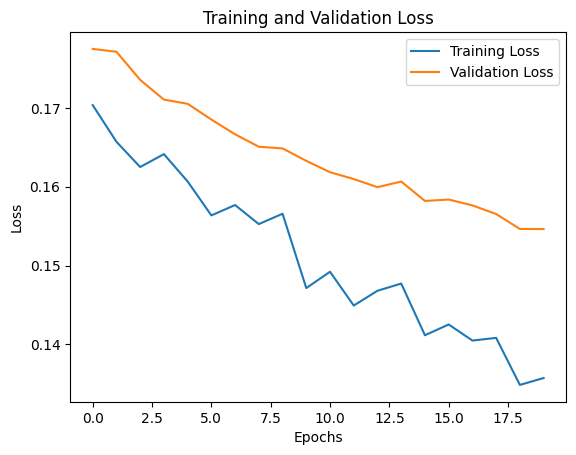

In [ ]:
import matplotlib.pyplot as plt

# Make predictions on new data
predictions = best_model.predict(valid_data)

# Print the predictions
#print(predictions)

# Plot the predictions and validation data
plt.plot(history_i.history['loss'], label='Training Loss')
plt.plot(history_i.history['val_loss'], label='Validation Loss')

# Add labels and title
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training and Validation Loss')

# Add legend and show plot
plt.legend()
plt.show()